In [1]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt

### Value iteration

In [2]:
def run_episode(env, policy, gamma, render = False):
    obs = env.reset()
    total_reward = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += reward
        if done:
            break
    return total_reward

def evaluate_policy(env, policy, gamma, n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

def extract_policy(v, gamma):
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy

def value_iteration(env, gamma):
    v = np.zeros(env.nS)  # initialize value-function
    max_iterations = 100000
    eps = 1e-20
    for i in range(1, max_iterations+1):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + gamma*prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            #print ('Value-iteration converged at iteration# %d.' %(i))
            break
    return v, i


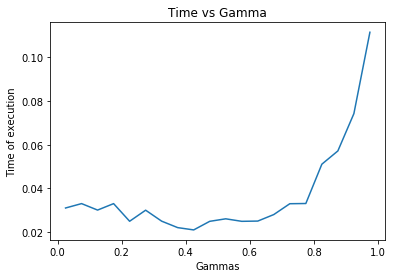

In [3]:
env_name = 'FrozenLake-v0'
env = gym.make(env_name)
env = env.unwrapped

N = 20

times=[0]*N
gammas=[0]*N
iterations=[0]*N
listscore=[0]*N
policys=[None]*N

for i in range(0, N):
    start = time.time()
    optimal_v, k = value_iteration(env, gamma=(i+0.5)/N)
    policy = extract_policy(optimal_v, gamma=(i+0.5)/N)
    scores = evaluate_policy(env, policy, gamma=(i+0.5)/N, n=100)
    end = time.time()
    gammas[i] = (i+0.5)/N
    iterations[i] = k
    times[i] = end-start
    listscore[i] = scores
    policys[i] = policy
    
plt.xlabel('Gammas')
plt.ylabel('Time of execution')
plt.title('Time vs Gamma')
plt.plot(gammas, times)

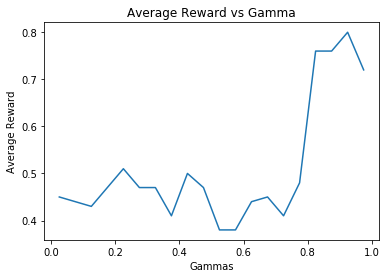

In [4]:
plt.xlabel('Gammas')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Gamma')
plt.plot(gammas, listscore)

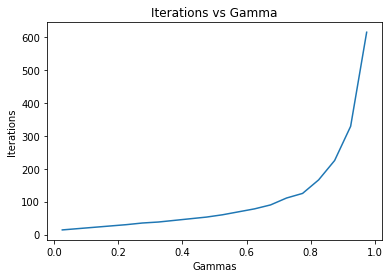

In [5]:
plt.xlabel('Gammas')
plt.ylabel('Iterations')
plt.title('Iterations vs Gamma')
plt.plot(gammas, iterations)

In [6]:
policys

[array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([2., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0.

### Policy iteration

In [7]:
def run_episode(env, policy, gamma, render = False):
    obs = env.reset()
    total_reward = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += reward
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, gamma, n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

def extract_policy(v, gamma):
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

def compute_policy_v(env, policy, gamma):
    v = np.zeros(env.nS)
    eps = 1e-6
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, is_done in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            break
    return v

def policy_iteration(env, gamma):
    policy = np.random.choice(env.nA, size=(env.nS))  
    max_iterations = 100000
    for i in range(1, max_iterations+1):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            # print ('Policy-Iteration converged at step %d.' %(i))
            break
        policy = new_policy
    return policy, i

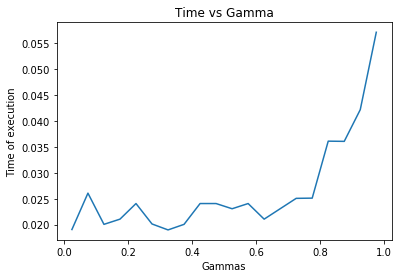

In [8]:
env_name = 'FrozenLake-v0'
env = gym.make(env_name)
env = env.unwrapped

N = 20

times=[0]*N
gammas=[0]*N
iterations=[0]*N
listscore=[0]*N
policys=[None]*N

for i in range(0,N):
    start=time.time()
    optimal_policy, k = policy_iteration(env, gamma = (i+0.5)/N)
    scores = evaluate_policy(env, optimal_policy, gamma = (i+0.5)/N)
    end=time.time()
    gammas[i]=(i+0.5)/N

    listscore[i]=scores
    iterations[i]=k
    policys[i] = optimal_policy
    
    times[i]=end-start

plt.title('Time vs Gamma')
plt.xlabel('Gammas')
plt.ylabel('Time of execution')
plt.plot(gammas, times)

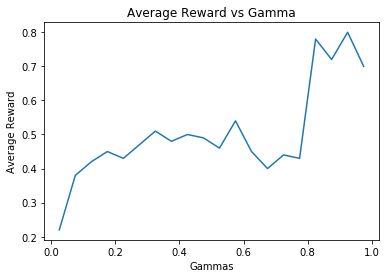

In [9]:
plt.title('Average Reward vs Gamma')
plt.xlabel('Gammas')
plt.ylabel('Average Reward')
plt.plot(gammas, listscore)

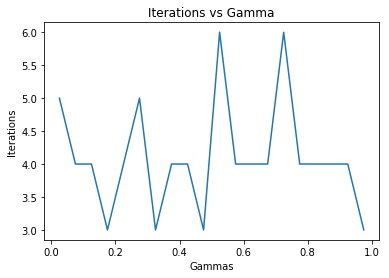

In [10]:
plt.title('Iterations vs Gamma')
plt.xlabel('Gammas')
plt.ylabel('Iterations')
plt.plot(gammas, iterations)

In [11]:
policys

[array([1., 2., 0., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([2., 3., 2., 3., 0., 0., 0., 0.

### Q Learning

In [14]:
def q_learn(epsilon=0., episodes=30000, alpha=0.8, gamma=0.95, maxsteps=1000, decay=False):
    
    env = gym.make('FrozenLake-v0')
    env = env.unwrapped
    
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    optimal = [0]*env.observation_space.n
    
    rewards = []
    iterations = []
    start = time.time()

    # Start
    for episode in range(episodes):
        state = env.reset()
        done = False
        r = 0

        for step in range(1, maxsteps):
            if done:
                break
                
            current = state

            # epsilon-greedy approach
            
            if np.random.rand() < epsilon: #exploit
                action = np.argmax(Q[current, :])
            else: #explore
                action = env.action_space.sample()

            state, reward, done, info = env.step(action)  
            r += reward
            Q[current, action] += alpha * (reward + gamma * np.max(Q[state, :]) - Q[current, action])

        rewards.append(r)
        iterations.append(step)
        
        if decay:
            epsilon = (1-2.71**(-episode/1000))
                 
    for k in range(env.observation_space.n):
        optimal[k] = np.argmax(Q[k, :])
    print(optimal)
    
    env.close()
    end = time.time()
    print("time :", end-start)
    
    return Q, rewards, iterations, end-start

In [15]:
Q_0, rewards_0, iterations_0, timediff_0 = q_learn(epsilon=0.)
Q_1, rewards_1, iterations_1, timediff_1 = q_learn(epsilon=0.1)
Q_2, rewards_2, iterations_2, timediff_2 = q_learn(epsilon=0., decay=True)
Q_3, rewards_3, iterations_3, timediff_3 = q_learn(epsilon=0.1, decay=True)

[2, 3, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0]
time : 3.9294490814208984
[1, 3, 2, 3, 2, 0, 2, 0, 3, 3, 1, 0, 0, 2, 1, 0]
time : 4.19719123840332
[0, 3, 3, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0]
time : 24.86906099319458
[0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]
time : 20.46241593360901


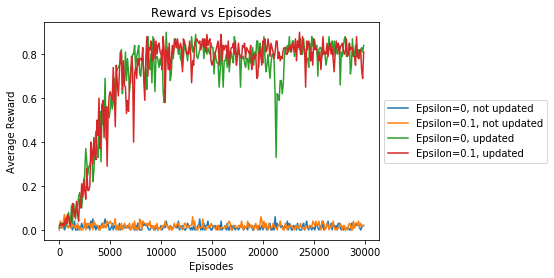

In [48]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

episodes = 30000
size = int(episodes / 300)
avg = []

for r in [rewards_0, rewards_1, rewards_2, rewards_3]:
    chunks = list(chunk_list(r, size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]
    avg.append(averages)

plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Reward vs Episodes')
plt.plot(range(0, len(rewards_0), size), avg[0], label='Epsilon=0, not updated')
plt.plot(range(0, len(rewards_1), size), avg[1], label='Epsilon=0.1, not updated')
plt.plot(range(0, len(rewards_2), size), avg[2], label='Epsilon=0, updated')
plt.plot(range(0, len(rewards_3), size), avg[3], label='Epsilon=0.1, updated')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

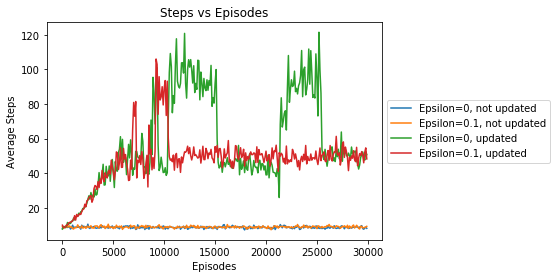

In [49]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

episodes = 30000
size = int(episodes / 300)
avg = []

for r in [iterations_0, iterations_1, iterations_2, iterations_3]:
    chunks = list(chunk_list(r, size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]
    avg.append(averages)

plt.xlabel('Episodes')
plt.ylabel('Average Steps')
plt.title('Steps vs Episodes')
plt.plot(range(0, len(iterations_0), size), avg[0], label='Epsilon=0, not updated')
plt.plot(range(0, len(iterations_1), size), avg[1], label='Epsilon=0.1, not updated')
plt.plot(range(0, len(iterations_2), size), avg[2], label='Epsilon=0, updated')
plt.plot(range(0, len(iterations_3), size), avg[3], label='Epsilon=0.1, updated')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [18]:
epsilon = [0.1, 0.3, 0.5, 0.7]

results = []
for e in epsilon:
    result = q_learn(epsilon=e, episodes=30000, decay=True)
    results.append(result)

[0, 3, 3, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0]
time : 19.94207525253296
[2, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]
time : 19.79769468307495
[0, 3, 1, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0]
time : 20.685972929000854
[0, 3, 3, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0]
time : 20.619877099990845


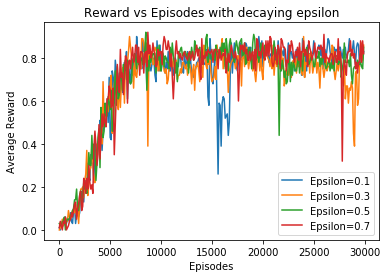

In [19]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

episodes = 30000
size = int(episodes / 300)
avg = []

for r in [results[0][1], results[1][1], results[2][1], results[3][1]]:
    chunks = list(chunk_list(r, size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]
    avg.append(averages)

plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Reward vs Episodes with decaying epsilon')
plt.plot(range(0, len(results[0][1]), size), avg[0], label='Epsilon=0.1')
plt.plot(range(0, len(results[1][1]), size), avg[1], label='Epsilon=0.3')
plt.plot(range(0, len(results[2][1]), size), avg[2], label='Epsilon=0.5')
plt.plot(range(0, len(results[3][1]), size), avg[3], label='Epsilon=0.7')
plt.legend()

In [29]:
alpha = [0.4, 0.6, 0.8]
gamma = [0.35, 0.65, 0.95]
results = []

for a in alpha:
    for g in gamma:
        print('alpha =', a, 'gamma =', g)
        result = q_learn(epsilon=0.1, episodes=30000, alpha=a, gamma=g, decay=True)
        results.append(result)

alpha = 0.4 gamma = 0.35
[1, 1, 1, 0, 0, 0, 1, 0, 3, 2, 0, 0, 0, 1, 2, 0]
time : 4.8850226402282715
alpha = 0.4 gamma = 0.65
[2, 3, 0, 3, 0, 0, 0, 0, 3, 1, 1, 0, 0, 2, 1, 0]
time : 11.220978736877441
alpha = 0.4 gamma = 0.95
[0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]
time : 19.996302127838135
alpha = 0.6 gamma = 0.35
[2, 3, 1, 3, 1, 0, 2, 0, 3, 2, 0, 0, 0, 3, 2, 0]
time : 4.688474893569946
alpha = 0.6 gamma = 0.65
[1, 3, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 2, 0]
time : 12.26365876197815
alpha = 0.6 gamma = 0.95
[0, 3, 3, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0]
time : 21.407071113586426
alpha = 0.8 gamma = 0.35
[1, 3, 1, 3, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0]
time : 11.293151378631592
alpha = 0.8 gamma = 0.65
[1, 1, 0, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 2, 0]
time : 13.168105602264404
alpha = 0.8 gamma = 0.95
[0, 3, 3, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0]
time : 24.249700784683228


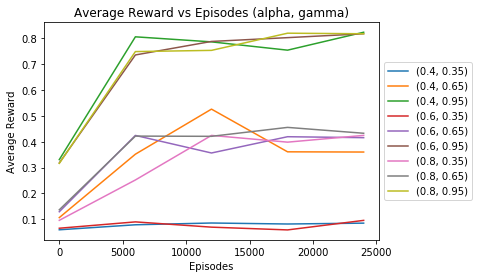

In [75]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

episodes = 30000
size = int(episodes / 5)
avg = []
tmp = [(x,y) for x in alpha for y in gamma]

# plt.figure(figsize=(16, 8))
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes (alpha, gamma)')

for i, result in enumerate(results):
    r = result[1]
    chunks = list(chunk_list(r, size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]

    plt.plot(range(0, len(r), size), averages, label=tmp[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

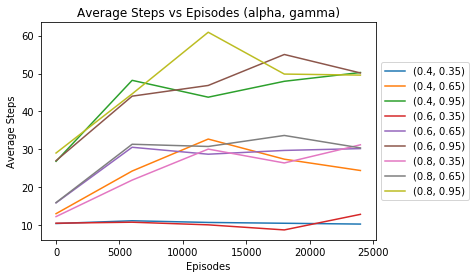

In [76]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

episodes = 30000
size = int(episodes / 5)
avg = []
tmp = [(x,y) for x in alpha for y in gamma]

# plt.figure(figsize=(16, 8))
plt.xlabel('Episodes')
plt.ylabel('Average Steps')
plt.title('Average Steps vs Episodes (alpha, gamma)')

for i, result in enumerate(results):
    r = result[2]
    chunks = list(chunk_list(r, size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]

    plt.plot(range(0, len(r), size), averages, label=tmp[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<BarContainer object of 9 artists>

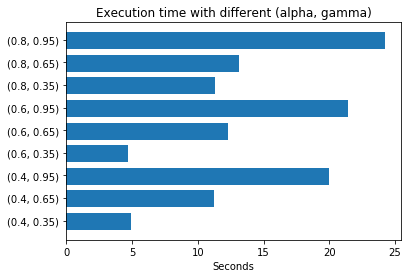

In [73]:
times = [r[3] for r in results]

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(times))  # the x locations for the groups

ax.set_yticks(ind+width/20)
ax.set_yticklabels(tmp, minor=False)
plt.title('Execution time with different (alpha, gamma)')
plt.xlabel('Seconds')
ax.barh(ind, times, width)

In [24]:
# alpha = 0.8, gamma = 0.95
Q = results[8][0]

env = gym.make('FrozenLake-v0')
state = env.reset()
done = False
env.render()

while not done:
    action = np.argmax(Q[state, :])
    state2, reward, done, info = env.step(action)  
    state = state2
    env.render()


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
 